## Under-sampling techniques experiment on highly imbalanced data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.style
matplotlib.style.use('ggplot')

from itertools import combinations

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

# keeping examples
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour

# deleting examples
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler

# keeping + deleting examples
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [2]:
data = pd.read_csv("fraud_data.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

In [4]:
data["Class"].value_counts()

0    21337
1      356
Name: Class, dtype: int64

In [5]:
data["Class"].value_counts(normalize=True)

0    0.983589
1    0.016411
Name: Class, dtype: float64

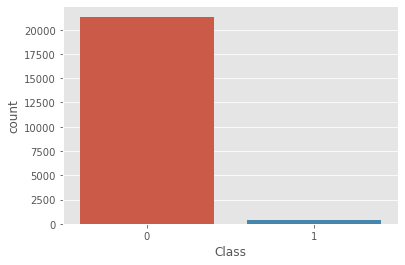

In [6]:
sns.countplot(x="Class", data=data);

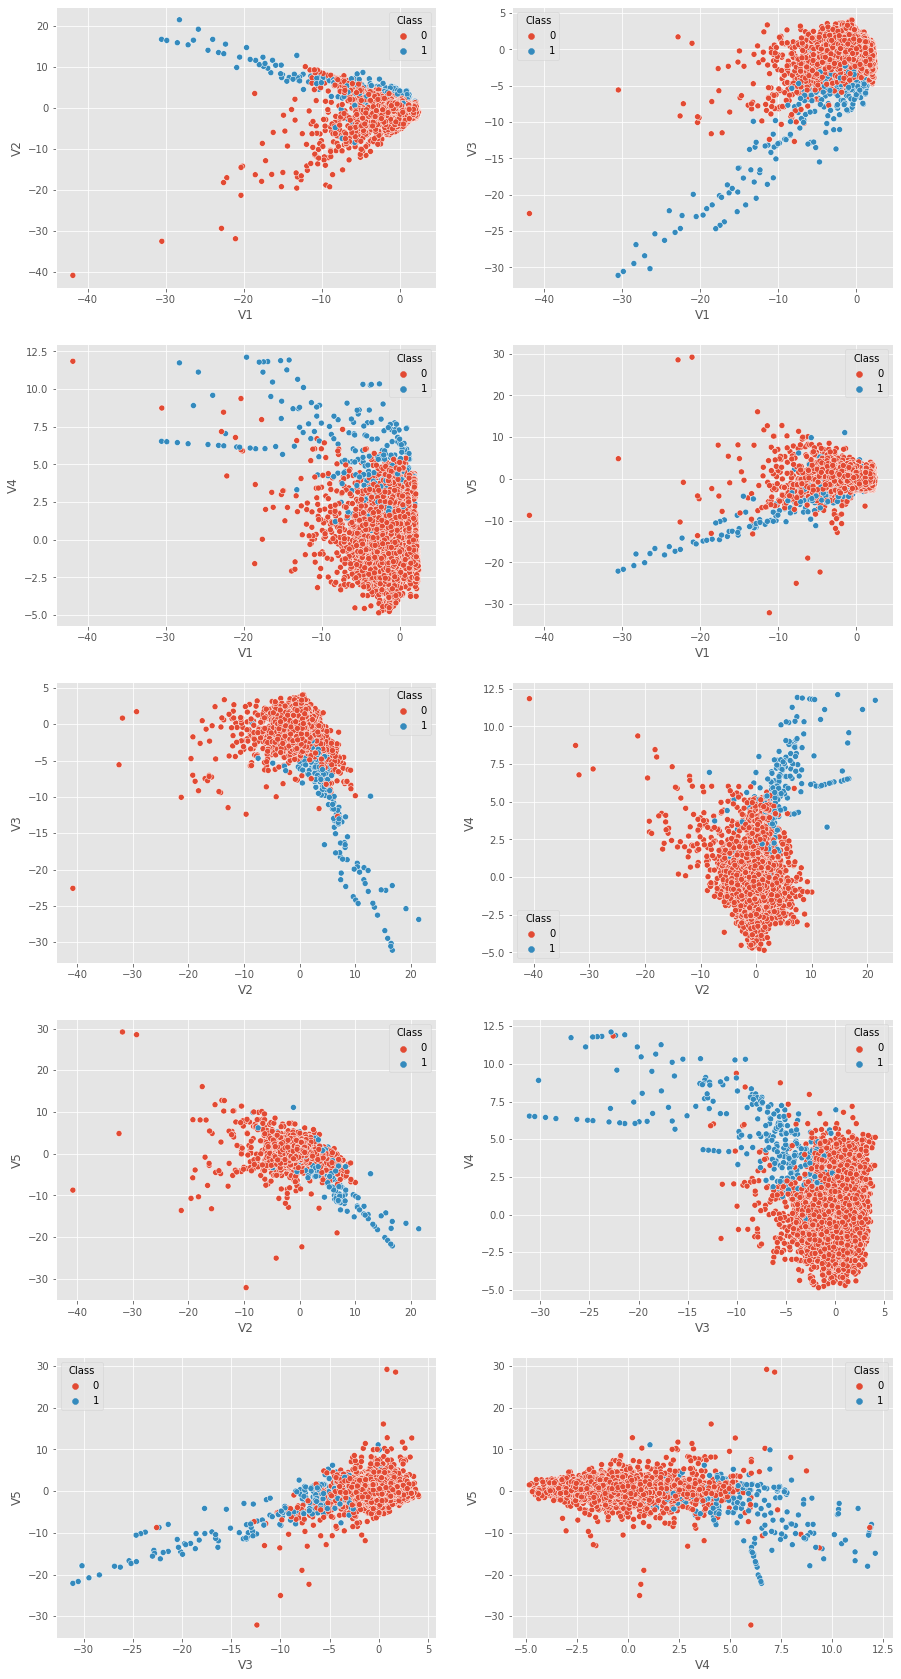

In [7]:
pairs = list(combinations(data.columns[:5], 2))

f, axes = plt.subplots(5, 2, figsize=(15,30))
for idx, pair in enumerate(pairs):
    i, j = divmod(idx, 2)
    sns.scatterplot(x=pair[0], y=pair[1], hue="Class", data=data, ax=axes[i, j])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Class", axis=1), data["Class"], train_size=0.8, stratify=data["Class"])

In [9]:
# Undersampling models
strategy = 0.5
nm1 = NearMiss(sampling_strategy=strategy, version=1)
nm2 = NearMiss(sampling_strategy=strategy, version=2)
nm3 = NearMiss(version=3, n_neighbors_ver3=3)
cnn = CondensedNearestNeighbour(n_seeds_S=100)

tl = TomekLinks()
enn = EditedNearestNeighbours()
rus = RandomUnderSampler(sampling_strategy=strategy)

oss = OneSidedSelection(n_seeds_S=100)
ncr = NeighbourhoodCleaningRule()

In [10]:
comparison_items = [{
    "name": "Original",
    "model": None,
    "X": X_train,
    "y": y_train
}, {
    "name": "Near Miss 1",
    "model": nm1,
    "X": None,
    "y": None
}, {
    "name": "Near Miss 2",
    "model": nm2,
    "X": None,
    "y": None
}, {
    "name": "Near Miss 3",
    "model": nm3,
    "X": None,
    "y": None
}, {
    "name": "Condensed Nearest Neighbors",
    "model": cnn,
    "X": None,
    "y": None
}, {
    "name": "Tomek Links",
    "model": tl,
    "X": None,
    "y": None
}, {
    "name": "Edited Nearest Neighbors",
    "model": enn,
    "X": None,
    "y": None
},{
    "name": "Random Undersampler",
    "model": rus,
    "X": None,
    "y": None,
    "roc": None
}, {
    "name": "One-Sided Selection",
    "model": oss,
    "X": None,
    "y": None
}, {
    "name": "Neighborhood Cleaning Rule",
    "model": ncr,
    "X": None,
    "y": None
}]

In [11]:
for technique in comparison_items:
    if technique["model"]:
        technique["X"], technique["y"] = technique["model"].fit_resample(X_train, y_train)

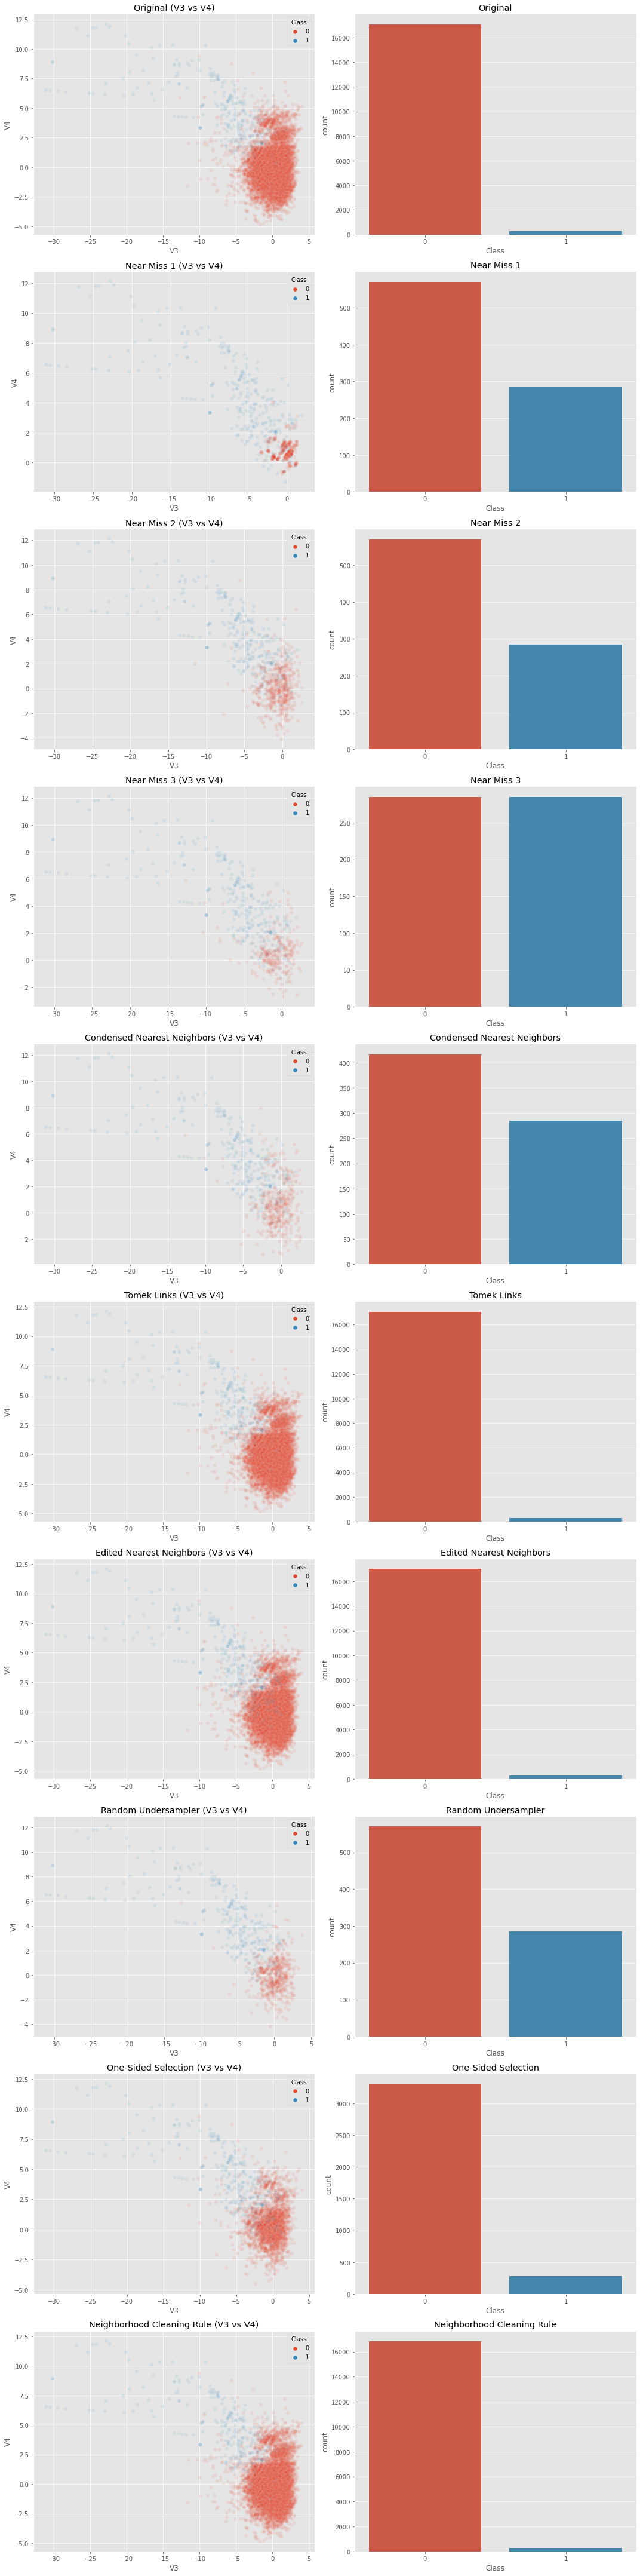

In [12]:
pair = ("V3", "V4")
fig, axes = plt.subplots(10, 2, figsize=(15, 60))

# Undersampling models
for idx, item in enumerate(comparison_items):
    data_copy = item["X"].copy()
    data_copy["Class"] = item["y"]
    sns.scatterplot(x=pair[0], y=pair[1], hue="Class", data=data_copy, ax=axes[idx, 0], alpha=0.1)
    sns.countplot(x="Class", data=data_copy, ax=axes[idx, 1])
    axes[idx, 0].set_title("{0} ({1} vs {2})".format(item["name"], pair[0], pair[1]))
    axes[idx, 1].set_title(item["name"])
fig.tight_layout()

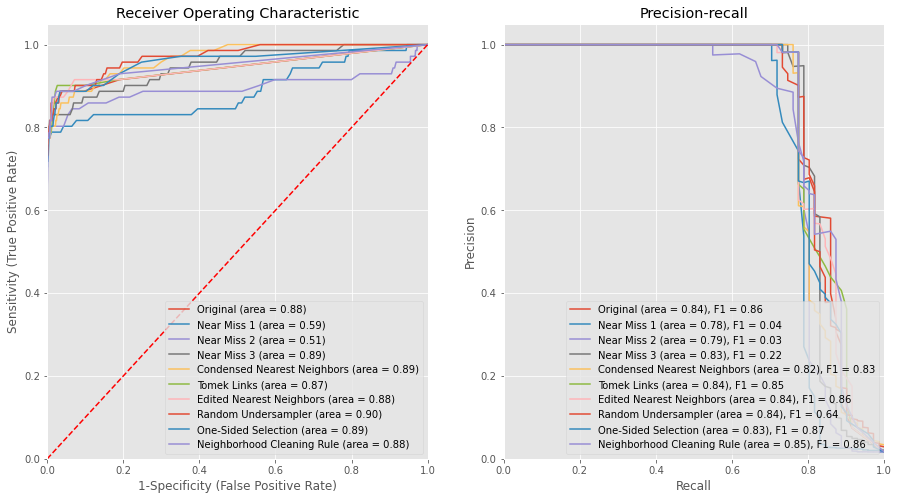

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

for item in comparison_items:
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(item["X"], item["y"])
    y_pred=rfc.predict(X_test)
    item["y_pred"] = y_pred

    # ROC
    fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
    auc_score = roc_auc_score(y_test,rfc.predict(X_test))
    ax1.plot(fpr, tpr, label='%s (area = %0.2f)' % (item['name'], auc_score))
    
    # Precision-recall
    precision, recall, thresholds = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:,1])
    auc_score = auc(recall, precision)
    f1 = f1_score(y_test, y_pred)
    ax2.plot(recall, precision, label='%s (area = %0.2f), F1 = %0.2f' % (item['name'], auc_score, f1))
    
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('1-Specificity (False Positive Rate)')
ax1.set_ylabel('Sensitivity (True Positive Rate)')
ax1.set_title('Receiver Operating Characteristic')
ax1.legend(loc="lower right")

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-recall')
ax2.legend(loc="lower right");